In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [5]:
stock = "HDFCBANK.NS"
hdfc_data = yf.download(stock, start, end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed


In [6]:
hdfc_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,,
2005-02-21,48.274677,56.049999,56.889999,55.424999,56.889999,3108700
2005-02-22,48.283302,56.060001,56.500000,55.599998,55.599998,1732660
2005-02-23,48.067963,55.810001,56.080002,55.410000,56.000000,3099060
2005-02-24,49.609661,57.599998,57.825001,55.904999,56.375000,3356420
2005-02-25,49.105820,57.014999,57.595001,56.209999,57.595001,1620480


In [7]:
hdfc_data.shape

(4937, 6)

In [8]:
hdfc_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4.937000e+03
mean,650.550430,680.274763,686.773163,673.504393,680.351400,8.029803e+06
std,551.302877,558.957330,563.508880,554.442070,559.061121,8.675790e+06
min,44.739132,51.945000,53.439999,44.799999,44.799999,0.000000e+00
25%,158.986694,178.514999,180.770004,175.309998,178.470001,3.519308e+06
50%,460.755310,495.524994,503.000000,490.000000,497.450012,5.789979e+06
75%,1130.518677,1181.800049,1197.949951,1166.150024,1180.000000,9.894003e+06
max,1871.750000,1871.750000,1880.000000,1858.550049,1877.699951,2.226710e+08


In [9]:
hdfc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4937 entries, 2005-02-21 to 2025-02-19
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, HDFCBANK.NS)  4937 non-null   float64
 1   (Close, HDFCBANK.NS)      4937 non-null   float64
 2   (High, HDFCBANK.NS)       4937 non-null   float64
 3   (Low, HDFCBANK.NS)        4937 non-null   float64
 4   (Open, HDFCBANK.NS)       4937 non-null   float64
 5   (Volume, HDFCBANK.NS)     4937 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 270.0 KB


In [10]:
hdfc_data.isna().sum()

Price      Ticker     
Adj Close  HDFCBANK.NS    0
Close      HDFCBANK.NS    0
High       HDFCBANK.NS    0
Low        HDFCBANK.NS    0
Open       HDFCBANK.NS    0
Volume     HDFCBANK.NS    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of HDFC data')

<Figure size 1500x500 with 0 Axes>

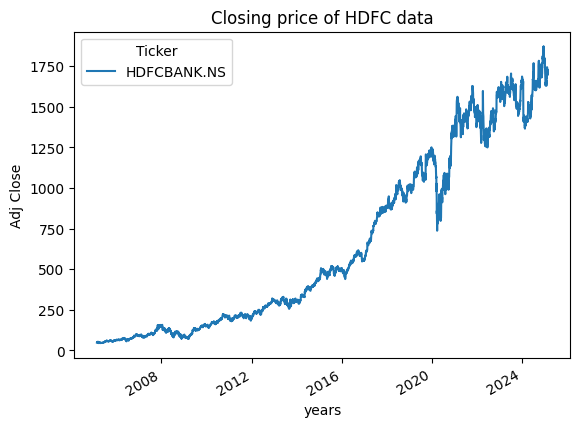

In [12]:
plt.figure(figsize = (15,5))
hdfc_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of HDFC data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of HDFC data")

In [14]:
hdfc_data.columns

MultiIndex([('Adj Close', 'HDFCBANK.NS'),
            (    'Close', 'HDFCBANK.NS'),
            (     'High', 'HDFCBANK.NS'),
            (      'Low', 'HDFCBANK.NS'),
            (     'Open', 'HDFCBANK.NS'),
            (   'Volume', 'HDFCBANK.NS')],
           names=['Price', 'Ticker'])

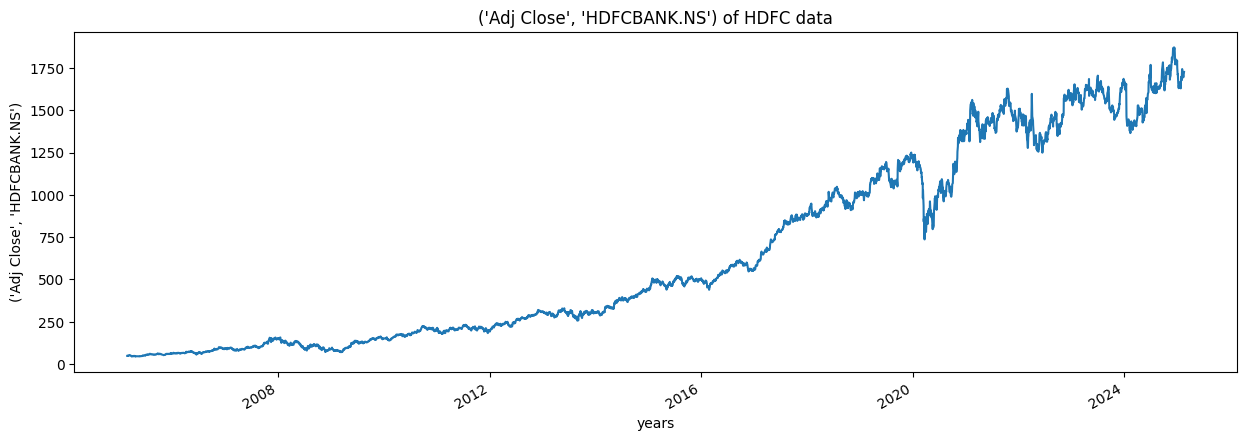

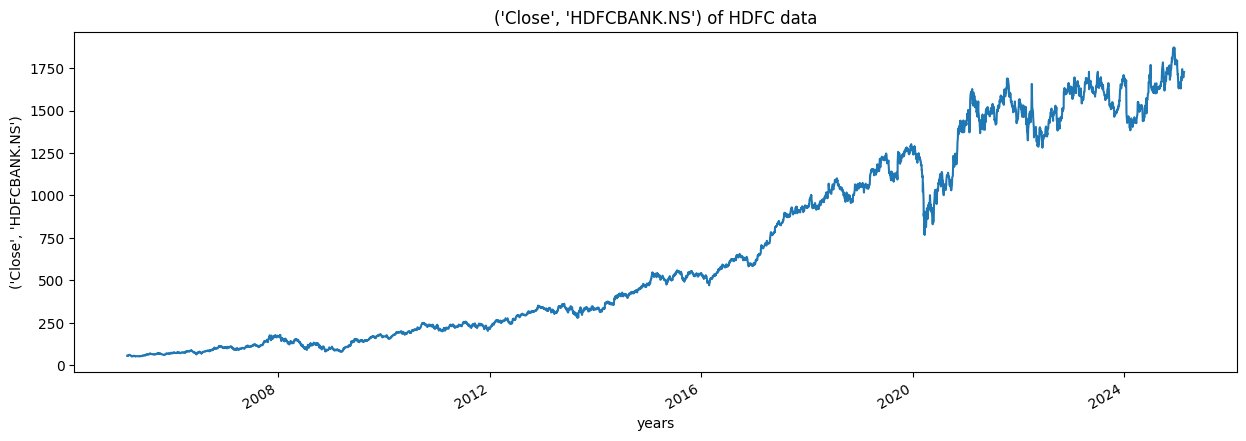

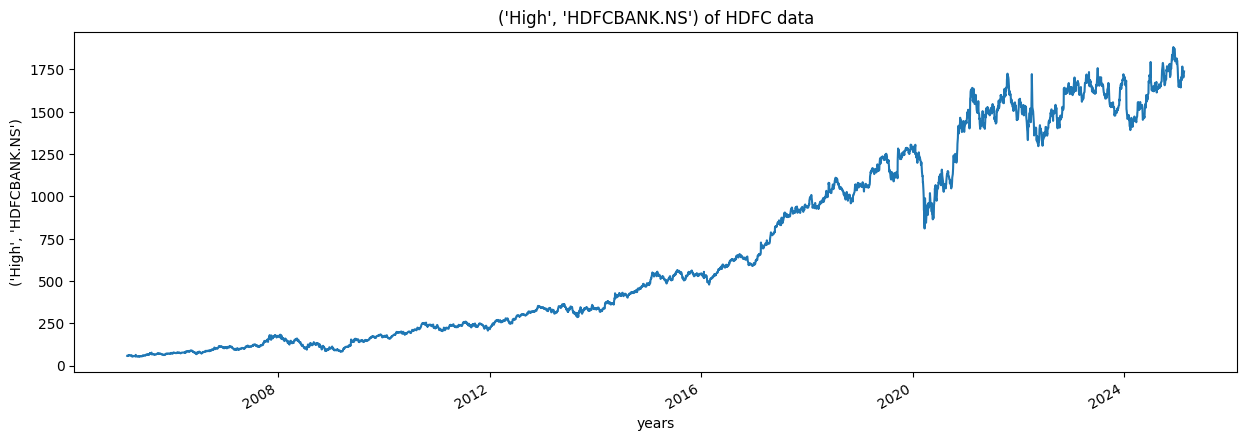

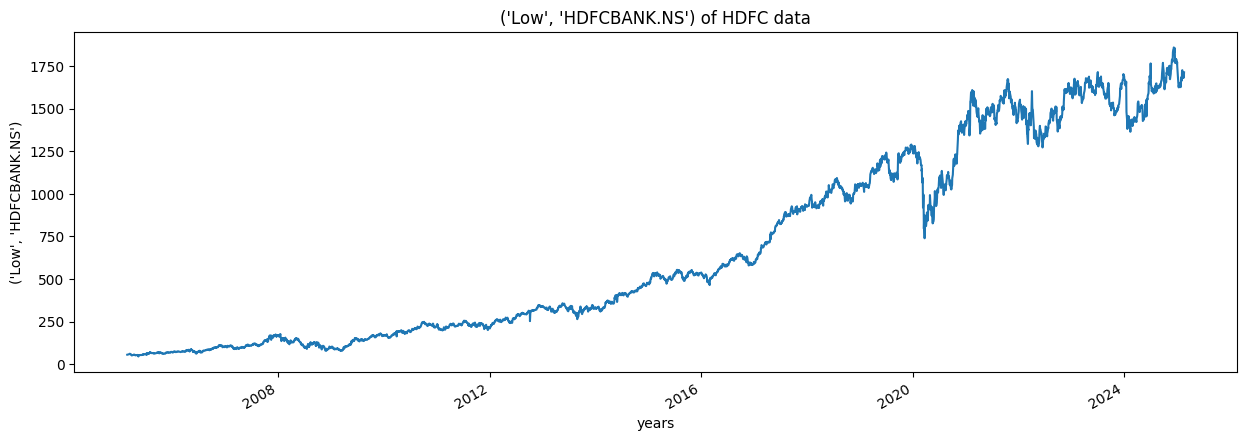

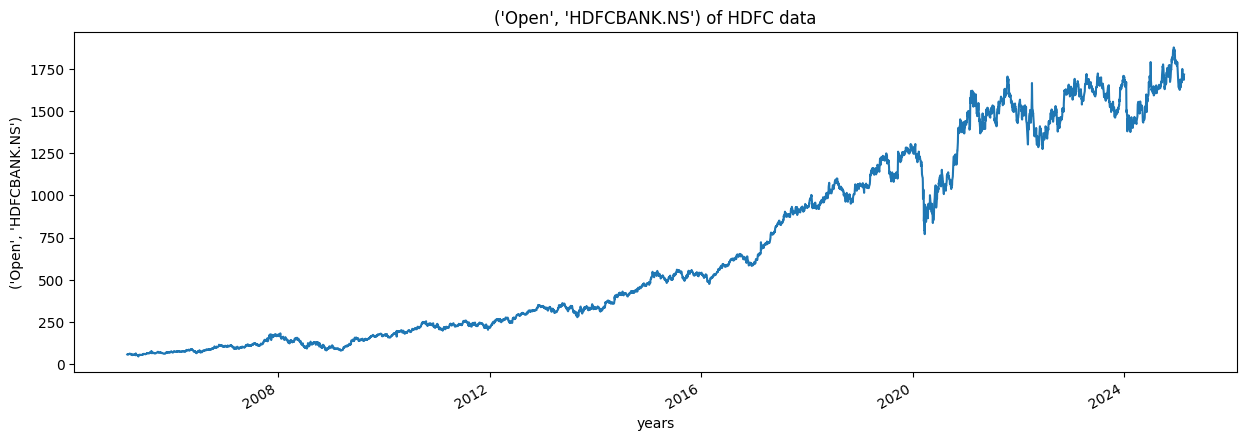

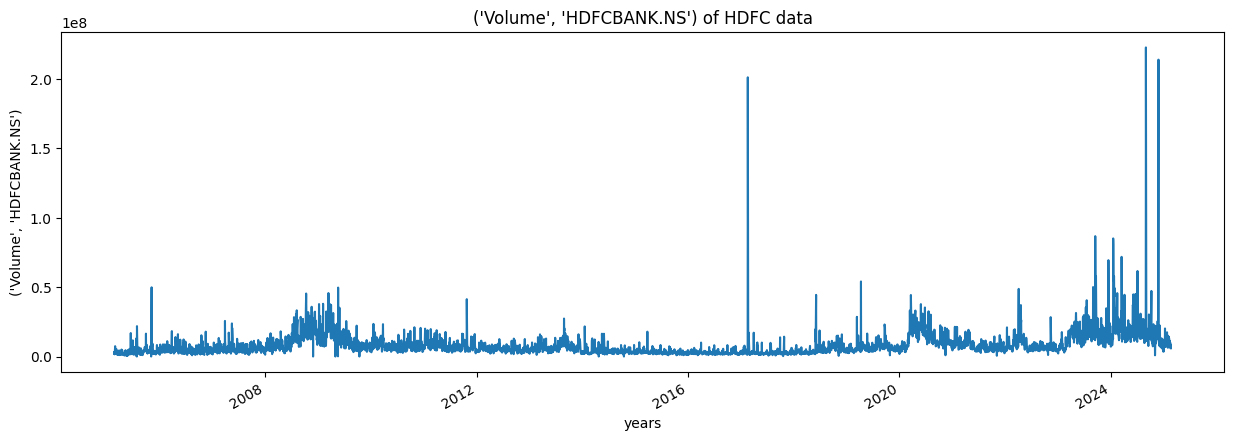

In [15]:
for column in hdfc_data.columns:
    plot_graph((15,5),hdfc_data[column], column)

In [16]:
for i in range(2004,2025):
    print(i,list(hdfc_data.index.year).count(i))

2004 0
2005 217
2006 247
2007 248
2008 246
2009 243
2010 250
2011 246
2012 245
2013 248
2014 244
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 246


In [17]:
hdfc_data['MA_for_250_days'] = hdfc_data['Adj Close'].rolling(250).mean()

In [18]:
hdfc_data['MA_for_250_days'][0:250].tail()

Date
2006-02-14          NaN
2006-02-15          NaN
2006-02-16          NaN
2006-02-17          NaN
2006-02-20    55.447707
Name: MA_for_250_days, dtype: float64

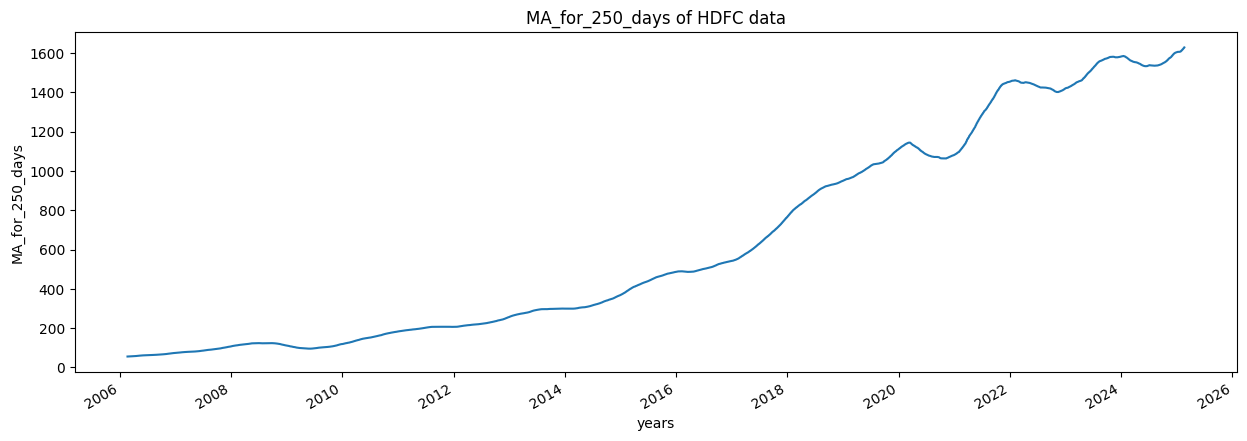

In [19]:
plot_graph((15,5), hdfc_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

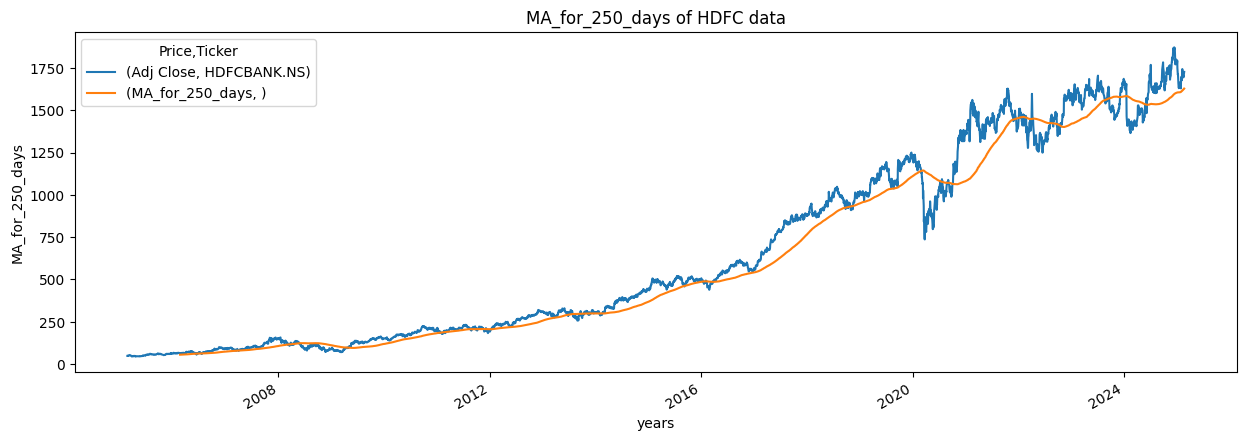

In [20]:
plot_graph((15,5), hdfc_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

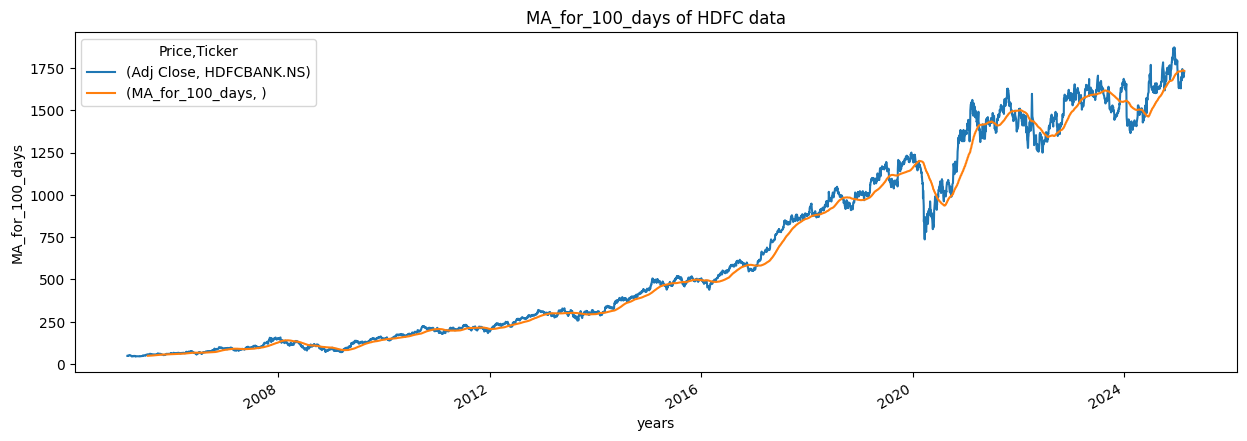

In [21]:
hdfc_data['MA_for_100_days'] = hdfc_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), hdfc_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

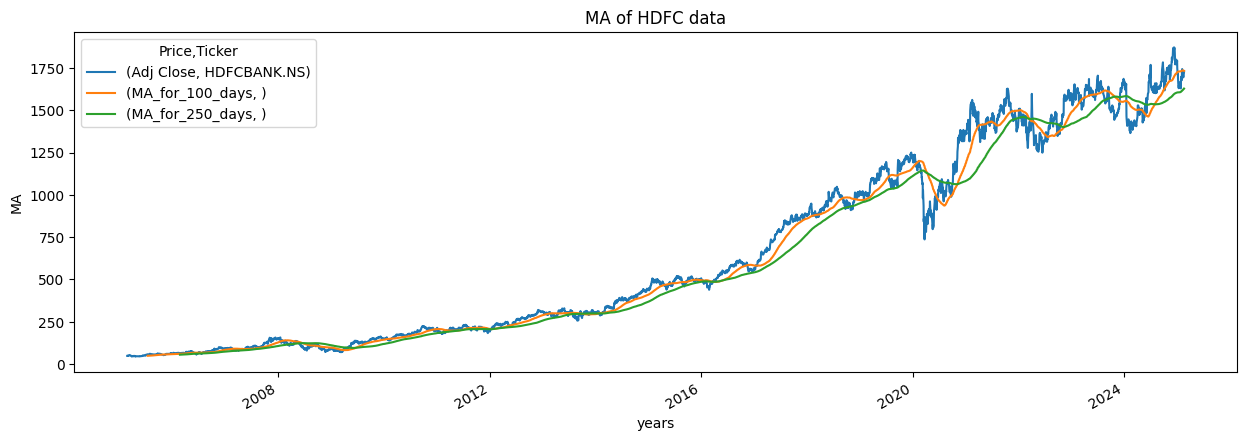

In [22]:
plot_graph((15,5), hdfc_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [23]:
hdfc_data['percentage_change_cp'] = hdfc_data['Adj Close'].pct_change()
hdfc_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,HDFCBANK.NS,
Date,,
2005-02-21,48.274677,NaN
2005-02-22,48.283302,0.000179
2005-02-23,48.067963,-0.004460
2005-02-24,49.609661,0.032073
2005-02-25,49.105820,-0.010156


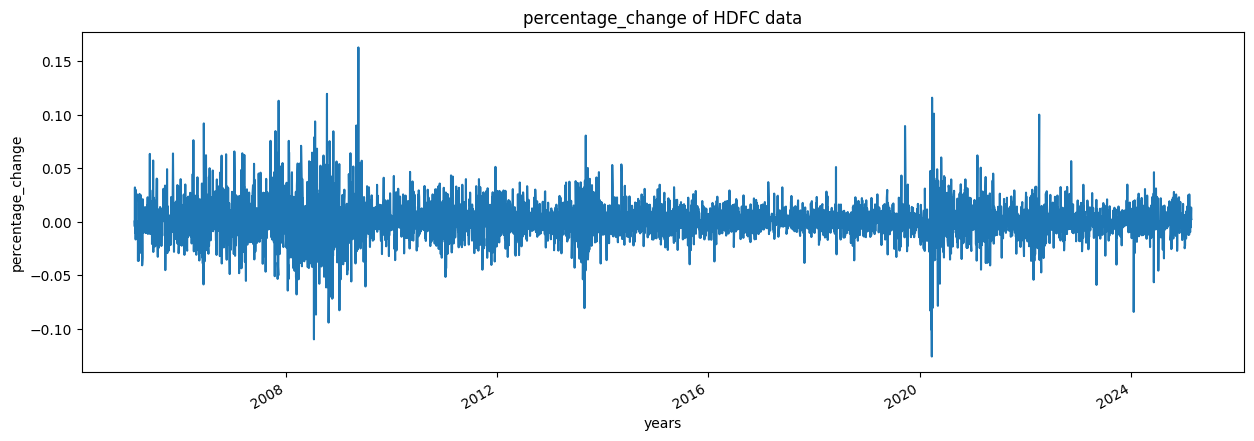

In [24]:
plot_graph((15,5), hdfc_data['percentage_change_cp'], 'percentage_change')

In [25]:
Adj_close_price = hdfc_data[['Adj Close']]

In [26]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([1871.75]), array([44.73913193]))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00193515],
       [0.00193987],
       [0.00182201],
       ...,
       [0.91549036],
       [0.91861025],
       [0.92088167]])

In [28]:
len(scaled_data)

4937

In [29]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [30]:
x_data[0],y_data[0]

(array([[1.93515288e-03],
        [1.93987373e-03],
        [1.82200926e-03],
        [2.66584576e-03],
        [2.39007214e-03],
        [3.19854721e-03],
        [2.73891546e-03],
        [2.70120301e-03],
        [2.67055825e-03],
        [3.13254520e-03],
        [3.85145789e-03],
        [4.46664568e-03],
        [4.93570450e-03],
        [4.52321853e-03],
        [4.25451052e-03],
        [3.92452342e-03],
        [3.50968017e-03],
        [3.52146662e-03],
        [2.49613972e-03],
        [2.18971925e-03],
        [1.87386336e-03],
        [1.52266692e-03],
        [5.75126396e-04],
        [0.00000000e+00],
        [6.36405479e-04],
        [8.24980273e-04],
        [6.50551303e-04],
        [1.19739232e-03],
        [1.51323985e-03],
        [1.54388461e-03],
        [9.66396753e-04],
        [1.59809183e-03],
        [2.06007460e-03],
        [1.28224220e-03],
        [1.77251871e-03],
        [1.84086757e-03],
        [1.97993512e-03],
        [9.00398916e-04],
        [4.2

In [31]:
int(len(x_data)*0.7)

3385

In [32]:
4937-100-int(len(x_data)*0.7)

1452

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3385, 100, 1)
(3385, 1)
(1452, 100, 1)
(1452, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\amjad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 195s 56ms/step - loss: 4.4987e-04
Epoch 2/2
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 201s 59ms/step - loss: 2.2584e-04


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


In [41]:
predictions

array([[0.57909256],
       [0.57886404],
       [0.578326  ],
       ...,
       [0.9043841 ],
       [0.9075446 ],
       [0.9115083 ]], dtype=float32)

In [42]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[1102.7476],
       [1102.3301],
       [1101.347 ],
       ...,
       [1697.0587],
       [1702.833 ],
       [1710.0747]], dtype=float32)

In [43]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[1089.67456055],
       [1088.65112305],
       [1064.9005127 ],
       ...,
       [1717.34997559],
       [1723.05004883],
       [1727.19995117]])

In [50]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape = mean_absolute_percentage_error(inv_y_test, inv_predictions) * 100

In [51]:
mape

np.float64(1.5541060754871887)

In [52]:
r2 = r2_score(inv_y_test, inv_predictions)
r2

0.984763651489486

In [53]:
accuracy = 100 - mape
print(f"Model Accuracy (MAPA): {accuracy:.2f}%")
print(f"R-squared (R²) Score: {r2:.4f}")

Model Accuracy (MAPA): 98.45%
R-squared (R²) Score: 0.9848


In [44]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [45]:
rmse

np.float64(27.929525607147408)

In [46]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-04-08,1089.674561,1102.747559
2019-04-09,1088.651123,1102.330078
2019-04-10,1064.900513,1101.347046
2019-04-11,1074.491211,1092.467651
2019-04-12,1078.179932,1088.654541


<Figure size 640x480 with 0 Axes>

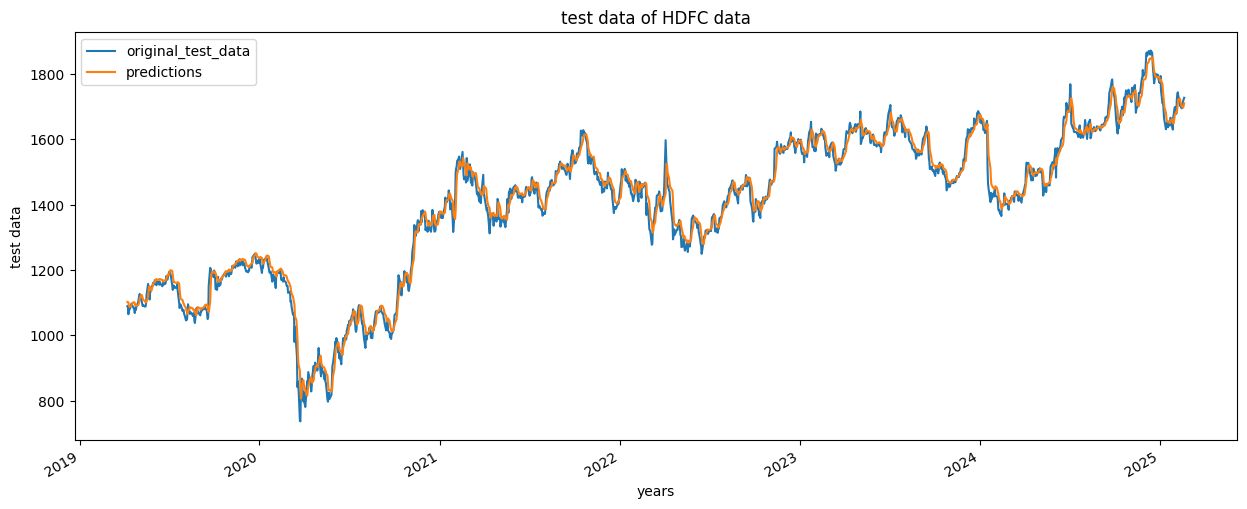

In [47]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

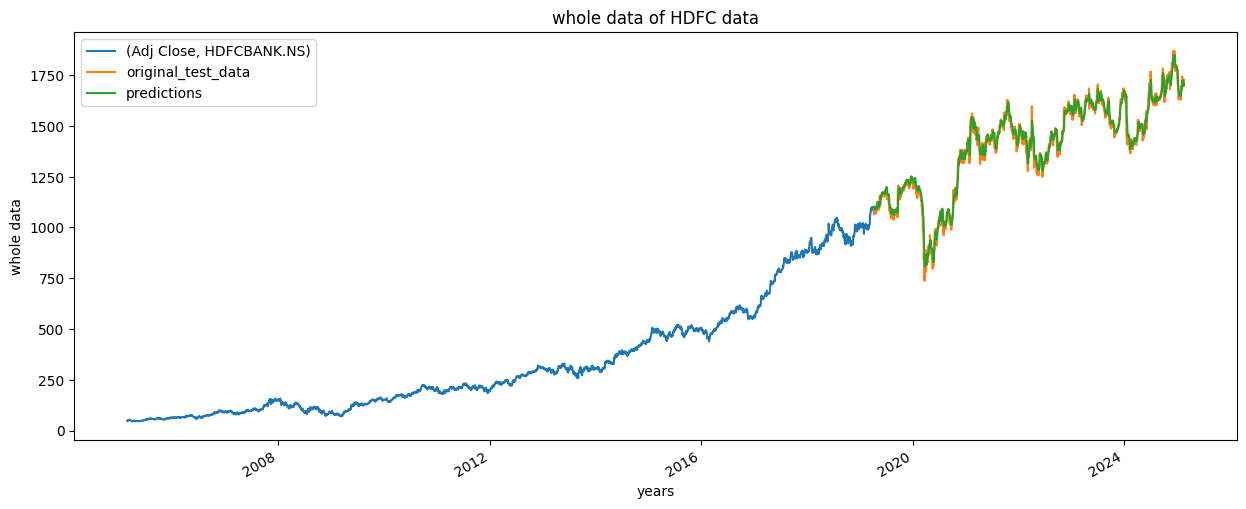

In [48]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [49]:
model.save("HDFC_stock_price_model.keras")